# 1.

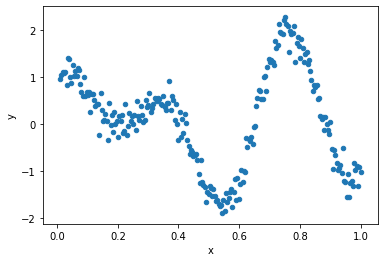

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

  
df = pd.read_csv("data/ml-hw1.csv",)
df.plot(x='x',y='y',kind = 'scatter')
plt.show()

/Users/aab/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


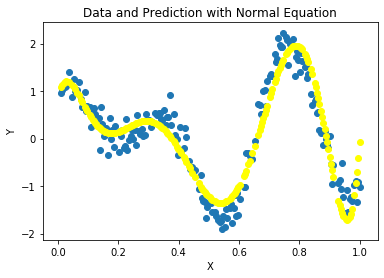

/Users/aab/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


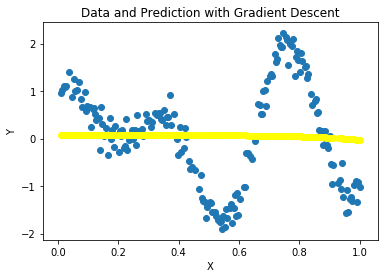

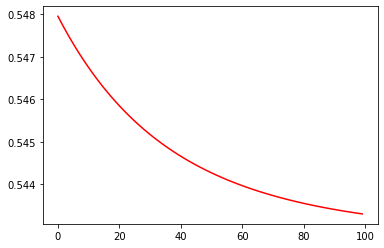

In [67]:
import numpy as np
from scipy import linalg
from collections import OrderedDict
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import model_selection


def standardize(data):

    return (data - np.mean(data))/(np.max(data) - np.min(data))

def hypothesis(theta, x):

    h = theta[0]
    for i in np.arange(1, len(theta)):
        h += theta[i]*x[i] ** i  
    return h        

def computeCost(x, y, theta,reg_lambda):
    errors = hypothesis(theta, x)-y
    reg = np.sum(theta**2)
    
    return (1/(2*len(y)))*np.sum(errors**2)  + reg_lambda*reg

def normal_equation(x,y,order):
#     print(x)
#     print(y)
    theta = []
    d = {}
    d['x' + str(0)] = np.ones([1,len(x_train)])[0]    
    for i in np.arange(1, order+1):                
        d['x' + str(i)] = x ** (i)        
    d = OrderedDict(sorted(d.items(), key=lambda t: t[0]))
    X = np.column_stack(d.values())
#     print(d)
#     print(X)
#     print(len(X))
#     print(len(X[0]))
    theta = np.matmul(np.matmul(linalg.pinv(np.matmul(np.transpose(X),X)), np.transpose(X)), y)
    return theta

def gradient_descent(x,y,order,numIters,learningRate,reg_lambda):
    
    costs = []
    theta = []
    d = {}
    d['x' + str(0)] = np.ones([1,len(x)])[0]    
    for i in np.arange(1, order+1):                
        d['x' + str(i)] = x ** (i)

    d = OrderedDict(sorted(d.items(), key=lambda t: t[0]))
    X = np.column_stack(d.values()) 
    m = len(x)
    theta = np.zeros(order + 1)           

    for i in range(numIters):
        h = hypothesis(theta, x)
        errors = h-y
        theta = theta - (learningRate * (1/m)*np.dot(errors, X))
        cost = computeCost(x, y, theta,reg_lambda)
        costs.append(cost)       
    return theta,costs

def regression(x,y,method = 'ne', order = 1, numIters = 20, learningRate = 0.01,reg_lambda=0):
    
    theta = []
    costs = []
    if method == 'ne': 
        theta = normal_equation(x,y,order)
    elif method == 'gd':
        theta, costs = gradient_descent(x,y,order,numIters,learningRate,reg_lambda)
        
    y_ = np.full(len(x), theta[0],dtype = float)
    for i in np.arange(1, len(theta)):
        y_ += theta[i]*(x ** i)
        
    plt.scatter(x, y)
    plt.scatter(x,y_ , color='red')
    method_name = 'Normal Equation' if method=='ne' else 'Gradient Descent'
    plt.title('Data and Prediction with '+method_name)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    if method=='gd':
        plt.plot(np.arange(numIters), costs, 'r')
        plt.show()
    return theta,costs

x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)
# print(x_train)
theta,_ = regression(method = 'ne', order = 7, numIters = 100, learningRate = 0.01,reg_lambda=0,x=x_train,y=y_train)
theta,costs = regression(method = 'gd', order = 7, numIters = 100, learningRate = 0.01,reg_lambda=0,x=x_train,y=y_train)



# 2.0.

In [ ]:
theta,costs = regression(method = 'gd', order = 6, numIters = 100, learningRate = 0.01,reg_lambda=0,x=x_train,y=y_train)
print(theta)
print(costs)

In [ ]:
#### MSE = 
#### step = 
#### order = 
#### learning rate = 
#### lambda = 

# Mine

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def computeCost(X,y,theta):
    return np.sum(np.power(((X @ theta.T)-y),2))/(2 * len(X))

def normal_equation(X,y):
    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    y_predict = X_new_b.dot(theta_best)
    
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    return theta,cost
def regression():
    #set hyper parameters
    alpha = 0.01
    iters = 1000
    g,cost = gradientDescent(X,y,theta,iters,alpha)
    print("g= ",g)
    finalCost = computeCost(X,y,g)
#     print("finalCost=",finalCost)
#     fig, ax = plt.subplots()  
#     ax.plot(np.arange(iters), cost, 'r')  
#     ax.set_xlabel('Iterations')  
#     ax.set_ylabel('Cost')  
#     ax.set_title('Error vs. Training Epoch')
    
    plt.scatter(X, y, color='blue')
    y_ = g[0]
    for i in np.arange(1, len(theta)):          
        y_ += g[i] * X ** i 
#     print(y_)
    plt.plot(x,y_ , color='red')
    plt.title('Data and Prediction')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    return theta,costs
    
my_data = df

#normalize the features
my_data = (my_data - my_data.mean())/my_data.std()

#setting the matrixes
X = my_data.iloc[:,0:1]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
y = my_data.iloc[:,1:2].values
theta = np.zeros([1,2])
regression()